In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



df = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

In [2]:
# Verificar tipos de datos y valores faltantes
print("Información del DataFrame:")
df.info()

# Resumen estadístico de las columnas numéricas
print("\nResumen estadístico:")
print(df.describe())

# Mostrar las primeras filas del DataFrame
print("\nPrimeras filas del DataFrame:")
print(df.head())


Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB

Resumen estadístico:
              year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   3.500000e+05   60000.000000
75%    2016.000000  

In [5]:
# Obtener valores únicos de diferentes columnas
fuel_unique = df['fuel'].unique()
seller_type_unique = df['seller_type'].unique()
transmission_unique = df['transmission'].unique()
owner_unique = df['owner'].unique()

# Imprimir resultados de forma organizada
print("Valores únicos en la columna 'fuel':", fuel_unique)
print("Valores únicos en la columna 'seller_type':", seller_type_unique)
print("Valores únicos en la columna 'transmission':", transmission_unique)
print("Valores únicos en la columna 'owner':", owner_unique)


Valores únicos en la columna 'fuel': ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
Valores únicos en la columna 'seller_type': ['Individual' 'Dealer' 'Trustmark Dealer']
Valores únicos en la columna 'transmission': ['Manual' 'Automatic']
Valores únicos en la columna 'owner': ['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [9]:
# Convertir columnas categóricas a variables dummy
df = pd.get_dummies(df, columns=['fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)

# Limpiar y convertir la columna 'year' en antigüedad del automóvil
df['car_age'] = 2023 - df['year']  # Calcular la antigüedad
df.drop('year', axis=1, inplace=True)  # Eliminar la columna 'year'

# Manejo de la columna de precios: filtrar valores atípicos
# Filtrar el 1% superior de los precios de venta si es necesario
upper_limit = df['selling_price'].quantile(0.99)
df = df[df['selling_price'] < upper_limit]

# Imprimir un resumen de las transformaciones
print("Transformaciones completas: variables dummy creadas, 'year' convertido a 'car_age', y precios filtrados.")

Transformaciones completas: variables dummy creadas, 'year' convertido a 'car_age', y precios filtrados.


In [11]:
from sklearn.model_selection import train_test_split

# Separar las características (X) de la variable objetivo (y)
X = df.drop(['selling_price', 'name'], axis=1)  # Características sin la variable objetivo y sin nombres
y = df['selling_price']  # Variable objetivo

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imprimir el tamaño de los conjuntos resultantes
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras")


Tamaño del conjunto de entrenamiento: 3436 muestras
Tamaño del conjunto de prueba: 859 muestras


In [13]:
from sklearn.linear_model import LinearRegression

# Inicializar el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
try:
    model.fit(X_train, y_train)
    print("Modelo entrenado con éxito.")
except Exception as e:
    print(f"Error al entrenar el modelo: {e}")


Modelo entrenado con éxito.


In [15]:
from sklearn.metrics import mean_squared_error, r2_score

# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE) y el coeficiente de determinación (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir los resultados de evaluación
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinación (R²): {r2:.2f}")

# Devolver los resultados
mse, r2


Error Cuadrático Medio (MSE): 72521450278.62
Coeficiente de Determinación (R²): 0.47


(72521450278.61545, 0.46659945168763384)

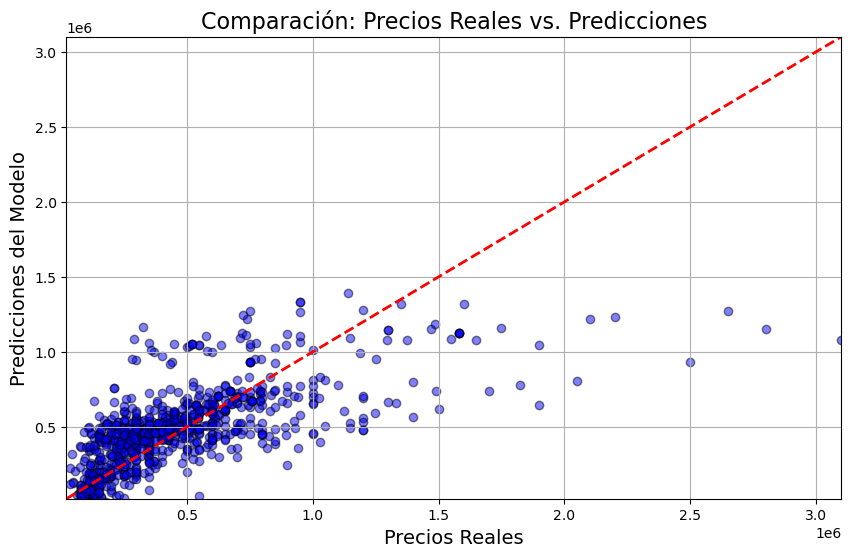

In [17]:
import matplotlib.pyplot as plt

# Crear un gráfico de dispersión para comparar precios reales y predicciones
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', edgecolors='k')
plt.xlabel("Precios Reales", fontsize=14)
plt.ylabel("Predicciones del Modelo", fontsize=14)
plt.title("Comparación: Precios Reales vs. Predicciones", fontsize=16)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Línea de referencia
plt.grid(True)
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.show()


In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas de desempeño
mse = mean_squared_error(y_test, y_pred)  # Error cuadrático medio
mae = mean_absolute_error(y_test, y_pred)  # Error absoluto medio
r2 = r2_score(y_test, y_pred)  # Coeficiente de determinación

# Imprimir las métricas de desempeño
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Error Absoluto Medio (MAE): {mae:.2f}")
print(f"Coeficiente de Determinación (R²): {r2:.2f}")

# Devolver las métricas
mse, mae, r2


Error Cuadrático Medio (MSE): 72521450278.62
Error Absoluto Medio (MAE): 180288.36
Coeficiente de Determinación (R²): 0.47


(72521450278.61545, 180288.35820587273, 0.46659945168763384)

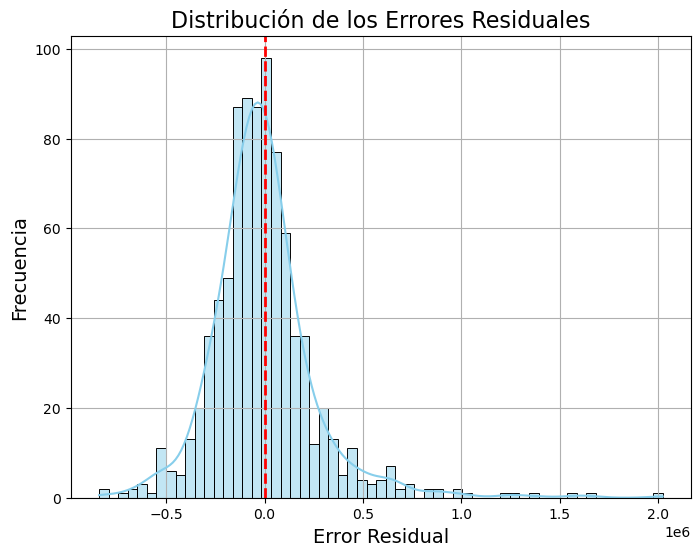

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular los errores residuales
residuals = y_test - y_pred

# Crear un gráfico de distribución de los errores residuales
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='skyblue', edgecolor='k')
plt.xlabel("Error Residual", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)
plt.title("Distribución de los Errores Residuales", fontsize=16)
plt.axvline(0, color='red', linestyle='--', lw=2)  # Línea vertical en 0 para referencia
plt.grid(True)
plt.show()


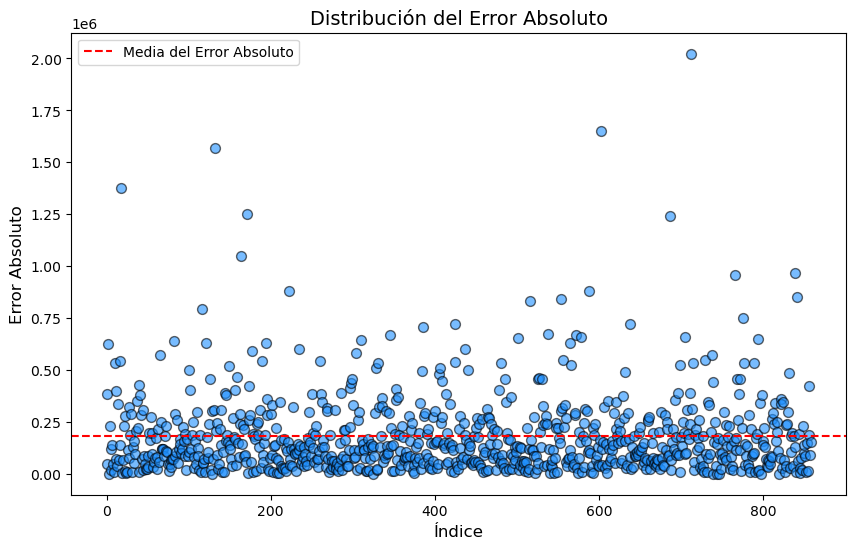

In [23]:
import matplotlib.pyplot as plt

# Crear la figura y ajustar el tamaño
plt.figure(figsize=(10, 6))

# Crear un gráfico de dispersión con color y transparencia personalizados
plt.scatter(range(len(y_test)), abs(residuals), color='dodgerblue', alpha=0.6, edgecolor='k', s=50)

# Agregar una línea horizontal para el valor medio del error absoluto
plt.axhline(y=np.mean(abs(residuals)), color='red', linestyle='--', linewidth=1.5, label='Media del Error Absoluto')

# Etiquetas y título con fuente más grande
plt.xlabel("Índice", fontsize=12)
plt.ylabel("Error Absoluto", fontsize=12)
plt.title("Distribución del Error Absoluto", fontsize=14)

# Añadir una leyenda
plt.legend()

# Mostrar la gráfica
plt.show()
